## Decision Tree

**Decision Tree** is one of the most popular supervised machine learning algorithm which is used for both regression and classification problems.

Decision tree uses the tree representation to solve the problem in which each internal node represents a feature, each branch  represents a decision, and each leaf node represents an outcome.

The whole idea is to create a tree like this for the entire data and process a single outcome at every leaf with the error rate as a low as possible.

There are different types of algorithms to build a decision tree. The most popular ones are:
* ID3 (Iterative Dichotomiser 3) --> uses Entropy function and Information gain as metrics.
* CART (Classification and Regression Trees) --> uses Gini Index(Classification) as metric.

<br>
**Classification using the ID3 algorithm**

> The basic question while forming a decision tree is **'how to select the nodes starting from root nodes to leaf nodes for splitting the data?.'**  
The answer is **'determine the attribute that best classifies the training data; use this attribute at the root of the tree. Repeat this process at for each branch.'**  

> This means we are performing top-down, greedy search through the space of possible decision trees.  
So, now the question will be **'how to choose the best attribute?. For that we have to measure the information gain of each attribute and the one with highest gain will be selected.'**  

> In order to define information gain precisely, we begin by defining a measure commonly used in information theory, called **entropy** that characterizes the impurity or randomness of an arbitrary collection of examples.

> **Entropy:**  
Entropy $H(S)$ is the amount of uncertainity in the dataset $S$.  
$$H(S) = -\sum_{i \in C}P(i)\log_n P(i) $$
where, $S$ is the dataset.  
$C$ is the set of classes.  
$P(i)$ is the proportion of number of elements in class $i \in C$ to the number of elements in set $S$.  
$n$ is the number of classes.  
when $H(S) = 0$, the set is said to be perfectly classified.

> **Information Gain:**  
Information Gain $IG(A, S)$ is the measure of the difference in entropy from before to after the set $S$ is split on an attribute $A$. In other words, how much uncertainity in $S$ was reduced after splitting $S$ on attribute $A$.  
$$IG(A, S) = H(S) - \sum_{t \in T} P(t)H(t)$$
where, $H(S)$ is the entropy of set $S$.  
$T$ is the subsets created from splitting $S$ by attribute $A$.  
$P(t)$ is the proportion of number of elements in t to number of elements in set $S$.  
$H(t)$ is the entropy of subset $t$.  

> Information gain can be calculated for each attribute and the attribute with highest Information Gain will be selected for splitting. And this process will be continued recursively till no more attribute is present or upto certain depth.

<br>
**Classification using the CART algorithm**

> In CART we use Gini index as a metric. Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified. It means an attribute with lower Gini index should be preferred.
$$Gini\_Index = 1 - \sum_{j} P_{j}^2$$
We will find the gini index for each attribute and will select the one with lowest value to split the data. Then continue the same process recursively till the end.


<br>
**Advantages**

>* Simple to understand, interpret and visualize.
* Little effort required for data preperations.
* Decision trees are able to handle both continuous and categorical variables.
* Non linear parameters won't effect the performance.

<br>
**Disadvantages**

>* Overfitting occurs when the algorithm captures the noise in the data.
* High Variance: the model can get unstable due to small variation in data.
* Low Biased Tree: a highly complicated decision tree tends to have a low bias which makes it difficult for the model to work with new data.
* Decision trees are less appropriate for estimation tasks where the goal is to predict the value of a continuous attribute.

<br>
**Assumptions**

> Some of the assumptions we make while using Decision tree:
* At the beginning, the whole training set is considered as the root.
* Feature values are preferred to be categorical. If the values are continuous then they are discretized prior to building the model.
* Records are distributed recursively on the basis of attribute values.
* Order to placing attributes as root or internal node of the tree is done by using some statistical approach.

## Use case implementation of Decision Tree:

We will build a model to classify whether the mushroom is edible or poisonous given a set of features like cap-shape, cap-color, ring number, habitat, etc.

Let's get started...

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the data
data = pd.read_csv('mushrooms.csv')

print(data.shape)

(8124, 23)


In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,True,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,True,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,True,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,True,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,False,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [4]:
# encode feature values, from strings to numeric (label encoding)
from sklearn.preprocessing import LabelEncoder

processed_data = data.copy()
encoder = LabelEncoder()

for col in processed_data.columns:
    processed_data[col] = encoder.fit_transform(processed_data[col])
    print(col, dict(enumerate(encoder.classes_)))

class {0: 'edible', 1: 'poisonous'}
cap-shape {0: 'bell', 1: 'conical', 2: 'convex', 3: 'flat', 4: 'knobbed', 5: 'sunken'}
cap-surface {0: 'fibrous', 1: 'grooves', 2: 'scaly', 3: 'smooth'}
cap-color {0: 'brown', 1: 'buff', 2: 'cinnamon', 3: 'gray', 4: 'green', 5: 'pink', 6: 'purple', 7: 'red', 8: 'white', 9: 'yellow'}
bruises {0: False, 1: True}
odor {0: 'almond', 1: 'anise', 2: 'creosote', 3: 'fishy', 4: 'foul', 5: 'musty', 6: 'none', 7: 'pungent', 8: 'spicy'}
gill-attachment {0: 'attached', 1: 'free'}
gill-spacing {0: 'close', 1: 'crowded'}
gill-size {0: 'broad', 1: 'narrow'}
gill-color {0: 'black', 1: 'brown', 2: 'buff', 3: 'chocolate', 4: 'gray', 5: 'green', 6: 'orange', 7: 'pink', 8: 'purple', 9: 'red', 10: 'white', 11: 'yellow'}
stalk-shape {0: 'enlarging', 1: 'tapering'}
stalk-root {0: 'bulbous', 1: 'club', 2: 'equal', 3: 'missing', 4: 'rooted'}
stalk-surface-above-ring {0: 'fibrous', 1: 'scaly', 2: 'silky', 3: 'smooth'}
stalk-surface-below-ring {0: 'fibrous', 1: 'scaly', 2: 'si

In [5]:
processed_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,1,7,1,0,1,0,...,3,7,7,0,2,1,4,0,3,4
1,0,2,3,9,1,0,1,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,0,3,8,1,1,1,0,0,1,...,3,7,7,0,2,1,4,1,2,2
3,1,2,2,8,1,7,1,0,1,1,...,3,7,7,0,2,1,4,0,3,4
4,0,2,3,3,0,6,1,1,0,0,...,3,7,7,0,2,1,0,1,0,0


In [6]:
processed_data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,2.491876,1.742984,4.323486,0.415559,4.788282,0.974151,0.161497,0.309207,4.729444,...,2.424914,5.446578,5.393402,0.0,1.965534,1.069424,2.291974,3.062038,3.644018,3.221073
std,0.499708,0.901287,1.179629,3.444391,0.492848,1.983678,0.158695,0.368011,0.462195,3.342402,...,0.870347,2.143900,2.194604,0.0,0.242669,0.271064,1.801672,2.825308,1.252082,2.530692
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000,...,2.000000,5.000000,5.000000,0.0,2.000000,1.000000,0.000000,1.000000,3.000000,0.000000
50%,0.000000,2.000000,2.000000,3.000000,0.000000,6.000000,1.000000,0.000000,0.000000,4.000000,...,3.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,3.000000
75%,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,1.000000,0.000000,1.000000,7.000000,...,3.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,6.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


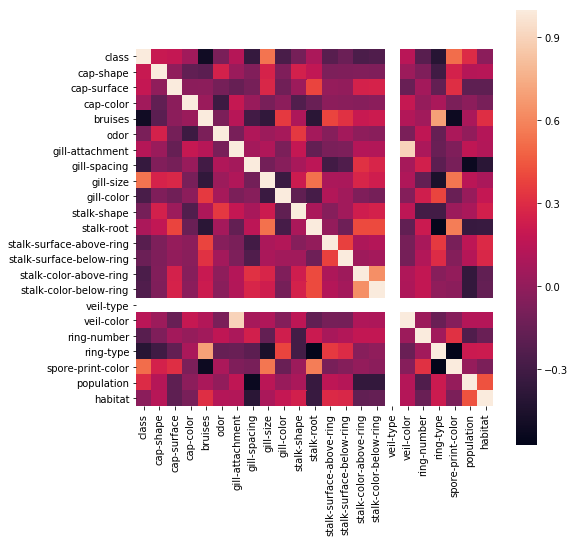

In [7]:
# plot heatmap
plt.figure(figsize=(8, 8))

sns.heatmap(processed_data.corr(), square=True)
plt.show()

In [8]:
# separate the feature and labels.
x = processed_data.iloc[:, 1:]
y = processed_data.iloc[:, :1]

# split into train and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=46)
print('x_train shape:{}'.format(x_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('x_test shape:{}'.format(x_test.shape))
print('y_test shape:{}'.format(y_test.shape))

x_train shape:(5686, 22)
y_train shape:(5686, 1)
x_test shape:(2438, 22)
y_test shape:(2438, 1)


In [9]:
# create model and fit on training data
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', random_state=46)
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=46,
            splitter='best')

Accuracy: 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1242
          1       1.00      1.00      1.00      1196

avg / total       1.00      1.00      1.00      2438

Confusion Matrix:



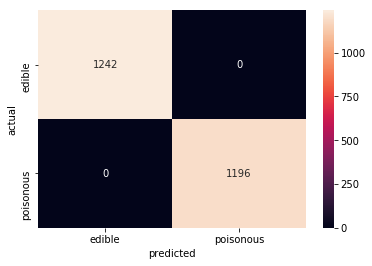

In [10]:
# evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predictions = model.predict(x_test)

print('Accuracy:', accuracy_score(y_test, predictions))

print(classification_report(y_test, predictions))
conf_matrix = pd.DataFrame(confusion_matrix(y_test, predictions),
                           index=['edible', 'poisonous'],
                           columns=['edible', 'poisonous'])

print('Confusion Matrix:\n')
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [11]:
# get visual representation of decision making (decision tree)
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(model, out_file=None,
                     feature_names=x_train.columns,
                     class_names=['edible', 'poisonous'],
                     filled=True, rounded=True,
                     special_characters=True)

graph = graphviz.Source(dot_data, format='pdf')
graph.render("edible or poisonous", cleanup=True)

'edible or poisonous.pdf'